In [97]:
import numpy as np
import pandas as pd

In [99]:
import numpy as np
print(np.__version__)

1.26.4


In [101]:
train_data=pd.read_csv('train_set.csv')
test_data=pd.read_csv('test_set.csv')
val_data=pd.read_csv('validation_set.csv')

In [103]:
train_data.iloc[0]

home_team_name                                   Sunderland
away_team_name                            Tottenham Hotspur
timestamp                                        1186832700
date_GMT                              Aug 11 2007 - 11:45am
Pre-Match PPG (Home)                                    0.0
                                              ...          
penalty_misses_away                                       2
goals_involved_per_90_overall_away                     3.14
assists_per_90_overall_away                             0.0
goals_per_90_overall_away                              3.14
goals_per_90_home_away                                 4.65
Name: 0, Length: 71, dtype: object

In [105]:
for i,j in enumerate(train_data.iloc[0]):
    print(i,j)

0 Sunderland
1 Tottenham Hotspur
2 1186832700
3 Aug 11 2007 - 11:45am
4 0.0
5 0.0
6 1.58
7 0.89
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 Stadium of Light (Sunderland)
20 2007/2008
21 5.0
22 5.0
23 5.0
24 6.0
25 11.0
26 11.0
27 49.0
28 54.0
29 1
30 0
31 home
32 Premier League
33 1331
34 37576
35 18787
36 18789
37 524
38 263
39 261
40 35
41 22
42 13
43 0
44 0
45 0
46 1
47 1
48 4.96
49 0.0
50 4.96
51 2.92
52 1205
53 38112
54 18947
55 19165
56 509
57 256
58 253
59 61
60 42
61 19
62 0
63 0
64 0
65 4
66 2
67 3.14
68 0.0
69 3.14
70 4.65


In [107]:
train_data.shape

(25059, 71)

In [109]:
test_data.shape

(3071, 71)

In [111]:
val_data.shape

(1865, 71)

In [113]:
columns_to_process = ['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)',
       'Home Team Pre-Match xG', 'Away Team Pre-Match xG', 'team_a_xg','team_b_xg']

train_data[columns_to_process] = train_data[columns_to_process].replace(0,np.nan)

train_data[columns_to_process] = train_data[columns_to_process].apply(lambda col: col.fillna(col.median()))

In [115]:
cols_to_drop = ['timestamp', 'date_GMT','league_x','Season','home_team_goal_count','away_team_goal_count']

# Drop the specified columns
test_data = test_data.drop(columns=cols_to_drop)
train_data = train_data.drop(columns=cols_to_drop)
val_data = val_data.drop(columns=cols_to_drop)

In [117]:
train_data.head(4)

,home_team_name,away_team_name,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,...,goals_away_away,assists_overall_away,assists_home_away,assists_away_away,penalty_goals_away,penalty_misses_away,goals_involved_per_90_overall_away,assists_per_90_overall_away,goals_per_90_overall_away,goals_per_90_home_away
0,Sunderland,Tottenham Hotspur,1.75,1.31,1.58,0.89,1.67,1.41,1.6,1.35,...,19,0,0,0,4,2,3.14,0.0,3.14,4.65
1,West Ham United,Tottenham Hotspur,1.33,0.57,1.47,0.89,1.67,1.41,1.6,1.35,...,19,0,0,0,4,2,3.14,0.0,3.14,4.65
2,Middlesbrough,Tottenham Hotspur,1.00,0.50,1.37,0.89,1.67,1.41,1.6,1.35,...,19,0,0,0,4,2,3.14,0.0,3.14,4.65
3,Everton,Tottenham Hotspur,2.00,0.67,1.95,0.89,1.67,1.41,1.6,1.35,...,19,0,0,0,4,2,3.14,0.0,3.14,4.65


In [119]:
train_data.isnull().sum()

home_team_name                        0
away_team_name                        0
Pre-Match PPG (Home)                  0
Pre-Match PPG (Away)                  0
home_ppg                              0
                                     ..
penalty_misses_away                   0
goals_involved_per_90_overall_away    0
assists_per_90_overall_away           0
goals_per_90_overall_away             0
goals_per_90_home_away                0
Length: 65, dtype: int64

In [121]:
#now this data contains --> team experience { player info + oddds data + pre match info}

In [123]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 65 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   home_team_name                      25059 non-null  object 
 1   away_team_name                      25059 non-null  object 
 2   Pre-Match PPG (Home)                25059 non-null  float64
 3   Pre-Match PPG (Away)                25059 non-null  float64
 4   home_ppg                            25059 non-null  float64
 5   away_ppg                            25059 non-null  float64
 6   Home Team Pre-Match xG              25059 non-null  float64
 7   Away Team Pre-Match xG              25059 non-null  float64
 8   team_a_xg                           25059 non-null  float64
 9   team_b_xg                           25059 non-null  float64
 10  average_goals_per_match_pre_match   25059 non-null  float64
 11  btts_percentage_pre_match           25059

In [125]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [126]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Define the target column and features
target = 'winner'
features = train_data.columns.drop([target])

# Convert appropriate columns to 'category' dtype for CatBoost
categorical_features = ['home_team_name', 'away_team_name', 'stadium_name']

train_data[categorical_features] = train_data[categorical_features].astype('category')

# Prepare data by removing unseen labels in validation and test sets
for col in categorical_features:
    train_data[col] = train_data[col].astype('category')
    val_data[col] = val_data[col].astype('category')
    test_data[col] = test_data[col].astype('category')

    unseen_labels_val = set(val_data[col].cat.categories) - set(train_data[col].cat.categories)
    unseen_labels_test = set(test_data[col].cat.categories) - set(train_data[col].cat.categories)

    if unseen_labels_val:
        print(f"Unseen labels in validation set for column '{col}': {unseen_labels_val}")
        val_data = val_data[~val_data[col].isin(unseen_labels_val)]

    if unseen_labels_test:
        print(f"Unseen labels in test set for column '{col}': {unseen_labels_test}")
        test_data = test_data[~test_data[col].isin(unseen_labels_test)]

# Ensure that we have non-empty validation and test sets after removing unseen labels
if val_data.empty or test_data.empty:
    raise ValueError("Validation or test set is empty after removing rows with unseen labels. Please check the data.")

# Encode target variable
target_encoder = LabelEncoder()
train_data[target] = target_encoder.fit_transform(train_data[target])
val_data[target] = target_encoder.transform(val_data[target])
test_data[target] = target_encoder.transform(test_data[target])

# Create Pool objects for CatBoost
train_pool = Pool(train_data[features], train_data[target], cat_features=categorical_features)
val_pool = Pool(val_data[features], val_data[target], cat_features=categorical_features)
test_pool = Pool(test_data[features], test_data[target], cat_features=categorical_features)

# Train CatBoost model
model = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.05,
    depth=4,
    l2_leaf_reg=3.0,
    rsm=0.8,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    random_seed=42,
    bagging_temperature=1.0,
    od_type='Iter',
    od_wait=200,
    verbose=100
)

model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=500)


Unseen labels in validation set for column 'home_team_name': {'Rīgas FS', 'Eintracht Frankfurt', 'Nottingham Forest', 'Monza', 'Shkupi', 'Union Saint-Gilloise', 'Dinamo Batumi', 'Víkingur Reykjavík', 'Ballkani', 'Apollon', 'AEK Larnaca', 'Cremonese'}
Unseen labels in test set for column 'home_team_name': {'Royal Antwerp FC', 'Luton Town', 'Raków Częstochowa', 'Bačka Topola', 'SSC Farul', 'Dnipro-1', 'Aris', 'Eintracht Frankfurt', 'Lens', 'Union Berlin', 'Häcken', 'Valmiera / BSS', 'Larne', 'Servette', 'Nottingham Forest', 'Monza', 'Swift Hesperange', 'Hamrun Spartans', 'Ballkani', 'Struga', "Atlètic Club d'Escaldes", 'Cremonese'}
Unseen labels in validation set for column 'away_team_name': {'Rīgas FS', 'Eintracht Frankfurt', 'Nottingham Forest', 'Monza', 'Shkupi', 'Union Saint-Gilloise', 'Dinamo Batumi', 'Víkingur Reykjavík', 'Ballkani', 'Apollon', 'AEK Larnaca', 'Cremonese'}
Unseen labels in test set for column 'away_team_name': {'Royal Antwerp FC', 'Luton Town', 'Raków Częstochowa', 

In [17]:
train_data.shape

(25059, 65)

In [18]:
test_data.shape

(2433, 65)

In [19]:
val_data.shape

(1690, 65)

Model: CatBoost
Accuracy: 0.6543362104397863
Classification Report:
              precision    recall  f1-score   support

        away       0.65      0.73      0.69       728
        draw       0.40      0.14      0.20       584
        home       0.69      0.87      0.77      1121

    accuracy                           0.65      2433
   macro avg       0.58      0.58      0.56      2433
weighted avg       0.61      0.65      0.61      2433



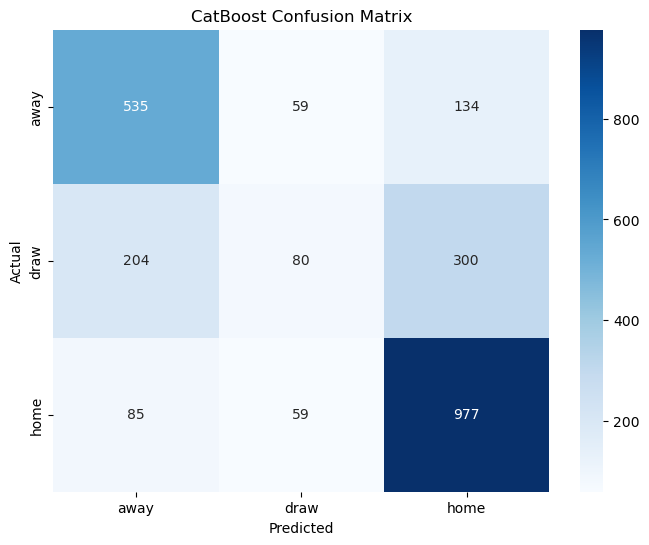

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title("CatBoost Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Predict on the test set
y_pred = model.predict(test_pool)

# Evaluate the model
accuracy = accuracy_score(test_data[target], y_pred)
report = classification_report(test_data[target], y_pred,target_names=target_encoder.classes_)

print("Model: CatBoost")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
cm = confusion_matrix(test_data[target], y_pred)
plot_confusion_matrix(cm, target_encoder.classes_)

In [21]:
train_data=pd.read_csv('train_set.csv')
test_data=pd.read_csv('test_set.csv')
val_data=pd.read_csv('validation_set.csv')

In [22]:
columns_to_process = ['Pre-Match PPG (Home)', 'Pre-Match PPG (Away)',
       'Home Team Pre-Match xG', 'Away Team Pre-Match xG', 'team_a_xg','team_b_xg']

train_data[columns_to_process] = train_data[columns_to_process].replace(0,np.nan)

train_data[columns_to_process] = train_data[columns_to_process].apply(lambda col: col.fillna(col.median()))

In [23]:
cols_to_drop = ['timestamp', 'date_GMT','Season','home_team_goal_count','away_team_goal_count']

# Drop the specified columns
test_data = test_data.drop(columns=cols_to_drop)
train_data = train_data.drop(columns=cols_to_drop)
val_data = val_data.drop(columns=cols_to_drop)

In [24]:
# Define the target column and features
target = 'winner'
features = train_data.columns.drop([target])

# Convert appropriate columns to 'category' dtype for CatBoost
categorical_features = ['home_team_name', 'away_team_name', 'stadium_name','league_x']

train_data[categorical_features] = train_data[categorical_features].astype('category')

# Prepare data by removing unseen labels in validation and test sets
for col in categorical_features:
    train_data[col] = train_data[col].astype('category')
    val_data[col] = val_data[col].astype('category')
    test_data[col] = test_data[col].astype('category')

    unseen_labels_val = set(val_data[col].cat.categories) - set(train_data[col].cat.categories)
    unseen_labels_test = set(test_data[col].cat.categories) - set(train_data[col].cat.categories)

    if unseen_labels_val:
        print(f"Unseen labels in validation set for column '{col}': {unseen_labels_val}")
        val_data = val_data[~val_data[col].isin(unseen_labels_val)]

    if unseen_labels_test:
        print(f"Unseen labels in test set for column '{col}': {unseen_labels_test}")
        test_data = test_data[~test_data[col].isin(unseen_labels_test)]

# Ensure that we have non-empty validation and test sets after removing unseen labels
if val_data.empty or test_data.empty:
    raise ValueError("Validation or test set is empty after removing rows with unseen labels. Please check the data.")

# Create Pool objects for CatBoost
train_pool = Pool(train_data[features], train_data[target], cat_features=categorical_features)
val_pool = Pool(val_data[features], val_data[target], cat_features=categorical_features)
test_pool = Pool(test_data[features], test_data[target], cat_features=categorical_features)

# Train CatBoost model
model = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.05,
    depth=4,
    l2_leaf_reg=3.0,
    rsm=0.8,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    random_seed=42,
    bagging_temperature=1.0,
    od_type='Iter',
    od_wait=200,
    verbose=100
)

model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=500)


Unseen labels in validation set for column 'home_team_name': {'Rīgas FS', 'Eintracht Frankfurt', 'Nottingham Forest', 'Monza', 'Shkupi', 'Union Saint-Gilloise', 'Dinamo Batumi', 'Víkingur Reykjavík', 'Ballkani', 'Apollon', 'AEK Larnaca', 'Cremonese'}
Unseen labels in test set for column 'home_team_name': {'Royal Antwerp FC', 'Luton Town', 'Raków Częstochowa', 'Bačka Topola', 'SSC Farul', 'Dnipro-1', 'Aris', 'Eintracht Frankfurt', 'Lens', 'Union Berlin', 'Häcken', 'Valmiera / BSS', 'Larne', 'Servette', 'Nottingham Forest', 'Monza', 'Swift Hesperange', 'Hamrun Spartans', 'Ballkani', 'Struga', "Atlètic Club d'Escaldes", 'Cremonese'}
Unseen labels in validation set for column 'away_team_name': {'Rīgas FS', 'Eintracht Frankfurt', 'Nottingham Forest', 'Monza', 'Shkupi', 'Union Saint-Gilloise', 'Dinamo Batumi', 'Víkingur Reykjavík', 'Ballkani', 'Apollon', 'AEK Larnaca', 'Cremonese'}
Unseen labels in test set for column 'away_team_name': {'Royal Antwerp FC', 'Luton Town', 'Raków Częstochowa', 

In [25]:
test_data_cat=test_data

In [26]:
y_pred = model.predict(test_pool)

if len(y_pred.shape) > 1 and y_pred.shape[1] == 1:
    y_pred = y_pred.flatten()

# Alternatively, you can use y_pred.ravel() which also flattens the array
# y_pred = y_pred.ravel()

# Adding predictions to the test_data DataFrame
test_data['winner_prediction'] = y_pred

# Initialize a dictionary to store accuracies for each league
league_accuracies = {}

for i in test_data['league_x'].unique():
    test_data_sub=test_data[test_data['league_x']==i]
    # Evaluate the model
    print(i)
    accuracy = accuracy_score(test_data_sub[target], test_data_sub['winner_prediction'])
    report = classification_report(test_data_sub[target], test_data_sub['winner_prediction'])

    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print(" ")
    league_accuracies[i] = accuracy

Premier League
Accuracy: 0.679465776293823
Classification Report:
              precision    recall  f1-score   support

        away       0.68      0.71      0.70       195
        draw       0.47      0.17      0.25       120
        home       0.70      0.88      0.78       284

    accuracy                           0.68       599
   macro avg       0.62      0.58      0.57       599
weighted avg       0.65      0.68      0.65       599

 
UEFA Champions League
Accuracy: 0.6655290102389079
Classification Report:
              precision    recall  f1-score   support

        away       0.63      0.66      0.65       153
        draw       0.29      0.10      0.15       126
        home       0.72      0.90      0.80       307

    accuracy                           0.67       586
   macro avg       0.55      0.55      0.53       586
weighted avg       0.61      0.67      0.62       586

 
Serie A
Accuracy: 0.6050955414012739
Classification Report:
              precision    recall 

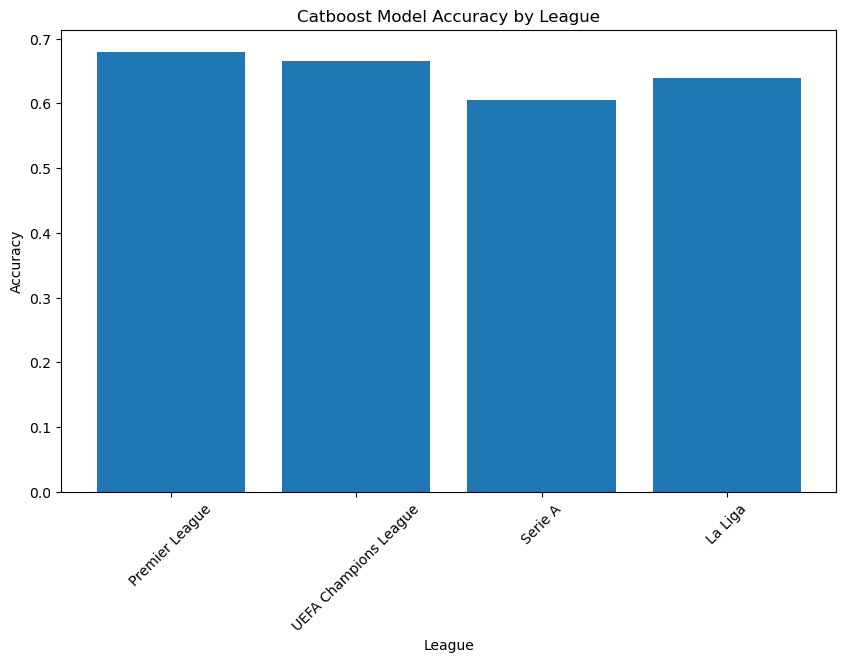

In [27]:
# Plotting the accuracies in a bar graph
plt.figure(figsize=(10, 6))
plt.bar(league_accuracies.keys(), league_accuracies.values())
plt.xlabel('League')
plt.ylabel('Accuracy')
plt.title('Catboost Model Accuracy by League')
plt.xticks(rotation=45)
plt.show()

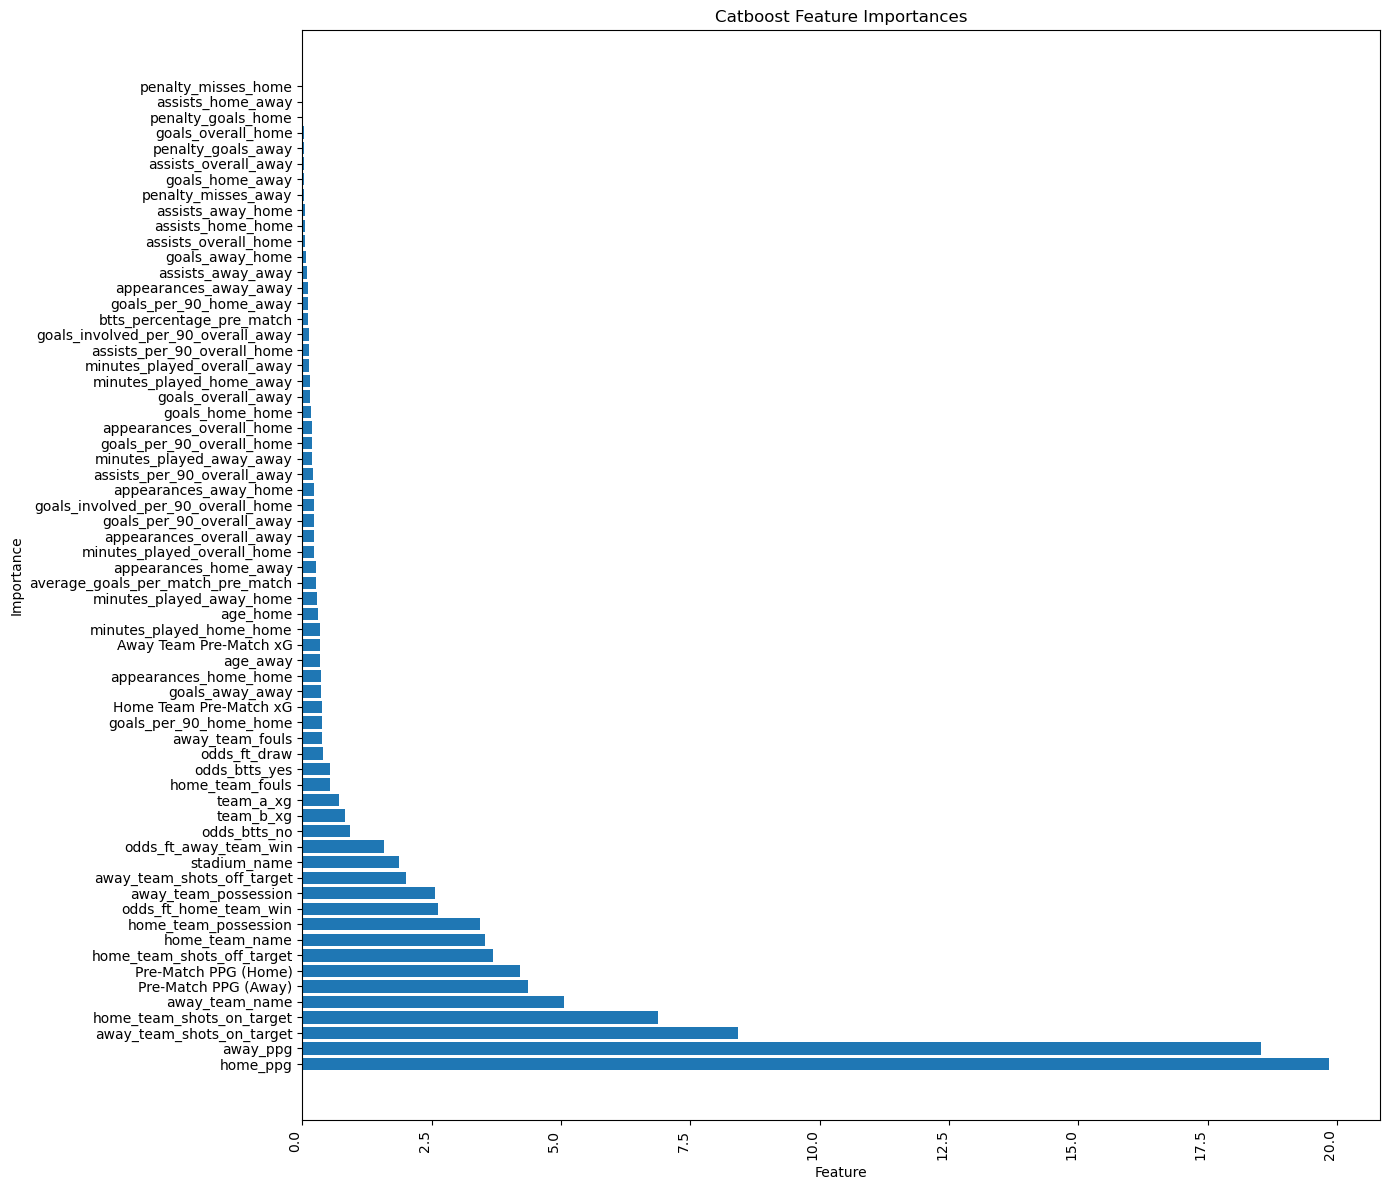

In [133]:
import matplotlib.pyplot as plt
feature_importances = model.get_feature_importance(train_pool)
feature_names = train_data[features].columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(14, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Catboost Feature Importances')
plt.tight_layout()
plt.show()

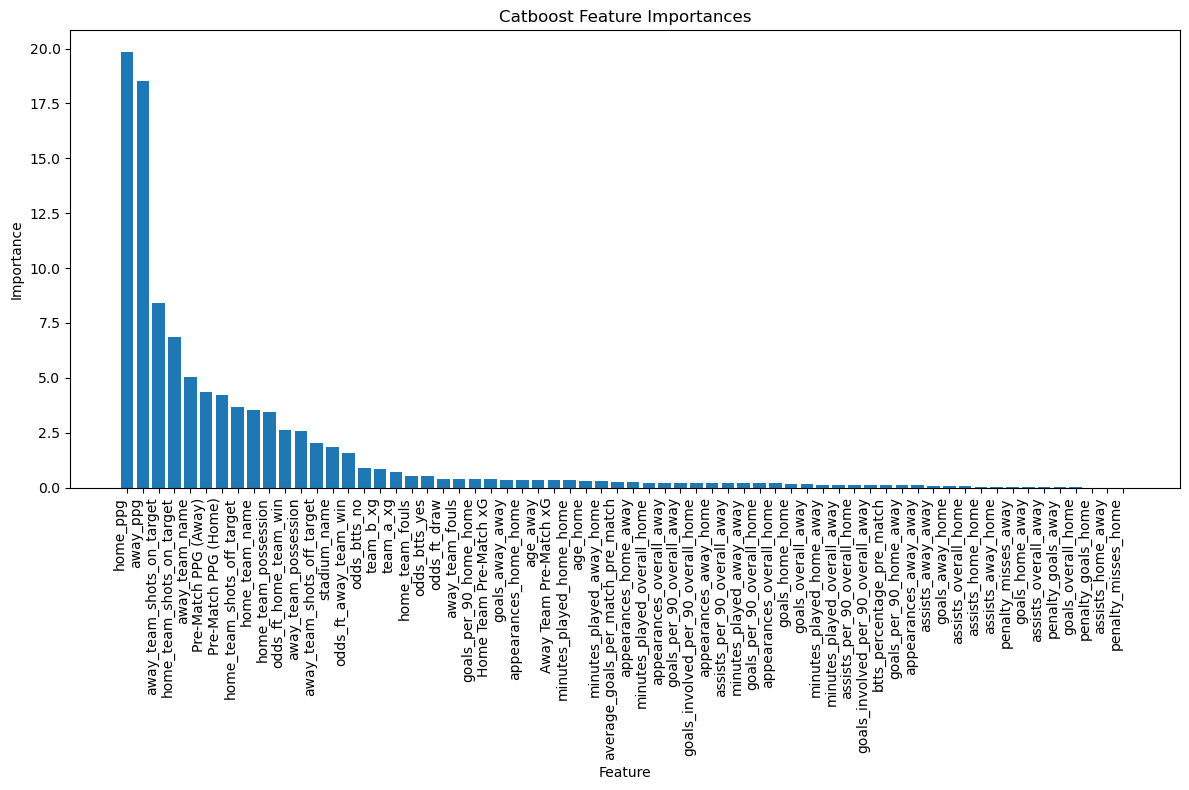

In [135]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have your model and feature importances calculated
# feature_importances = model.get_feature_importance(train_pool)
# feature_names = train_data[features].columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Catboost Feature Importances')
plt.tight_layout()
plt.show()

In [30]:
test_data_latest_data=test_data
test_data_latest_data=test_data_latest_data[['home_team_name','away_team_name','winner','winner_prediction']]
test_data_latest_data.tail(20)

,home_team_name,away_team_name,winner,winner_prediction
3017,Inter Milan,Salzburg,home,home
3018,Inter Milan,Salzburg,home,home
3019,Benfica,Salzburg,away,away
3022,Sporting Braga,Panathinaikos,home,home
3026,Molde,HJK,home,home
3028,Molde,KÍ,home,home
3030,Ferencváros,KÍ,away,away
3032,Olimpija,Ludogorets,home,home
3035,Astana,Dinamo Zagreb,away,away
3037,Astana,Dinamo Tbilisi,draw,home


In [31]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report


In [34]:
train_data=pd.read_csv('train_set.csv')
test_data=pd.read_csv('test_set.csv')
val_data=pd.read_csv('validation_set.csv')


cols_to_drop = ['timestamp', 'date_GMT','Season','home_team_goal_count','away_team_goal_count']

# Drop the specified columns
test_data = test_data.drop(columns=cols_to_drop)
train_data=train_data.drop(columns=cols_to_drop)
val_data=val_data.drop(columns=cols_to_drop)

In [35]:
# Define the target column and features
target = 'winner'
features = train_data.columns.drop([target])

# Convert appropriate columns to 'category' dtype for CatBoost
categorical_features = ['home_team_name', 'away_team_name', 'stadium_name','league_x']

# Ensure the categorical features are of category dtype
train_data[categorical_features] = train_data[categorical_features].astype('category')
val_data[categorical_features] = val_data[categorical_features].astype('category')
test_data[categorical_features] = test_data[categorical_features].astype('category')

# Prepare data for other models by label encoding categorical columns and target variable
label_encoders = {col: LabelEncoder().fit(train_data[col]) for col in categorical_features}
target_encoder = LabelEncoder().fit(train_data[target])

for col, le in label_encoders.items():
    train_data[col] = le.transform(train_data[col])
    # Transform validation and test data, handle unseen labels
    unseen_labels_val = set(val_data[col].unique()) - set(le.classes_)
    unseen_labels_test = set(test_data[col].unique()) - set(le.classes_)

    if unseen_labels_val:
        print(f"Unseen labels in validation set for column '{col}': {unseen_labels_val}")
        val_data = val_data[~val_data[col].isin(unseen_labels_val)]

    if unseen_labels_test:
        print(f"Unseen labels in test set for column '{col}': {unseen_labels_test}")
        test_data = test_data[~test_data[col].isin(unseen_labels_test)]

    le.classes_ = np.append(le.classes_, list(unseen_labels_val))
    le.classes_ = np.append(le.classes_, list(unseen_labels_test))
    val_data[col] = le.transform(val_data[col])
    test_data[col] = le.transform(test_data[col])
    
train_data[target] = target_encoder.transform(train_data[target])
val_data[target] = target_encoder.transform(val_data[target])
test_data[target] = target_encoder.transform(test_data[target])

Unseen labels in validation set for column 'home_team_name': {'Rīgas FS', 'Eintracht Frankfurt', 'Nottingham Forest', 'Monza', 'Shkupi', 'Union Saint-Gilloise', 'Dinamo Batumi', 'Víkingur Reykjavík', 'Ballkani', 'Apollon', 'AEK Larnaca', 'Cremonese'}
Unseen labels in test set for column 'home_team_name': {'Royal Antwerp FC', 'Luton Town', 'Raków Częstochowa', 'Bačka Topola', 'SSC Farul', 'Dnipro-1', 'Aris', 'Eintracht Frankfurt', 'Lens', 'Union Berlin', 'Häcken', 'Valmiera / BSS', 'Larne', 'Servette', 'Nottingham Forest', 'Monza', 'Swift Hesperange', 'Hamrun Spartans', 'Ballkani', 'Struga', "Atlètic Club d'Escaldes", 'Cremonese'}
Unseen labels in validation set for column 'away_team_name': {'Rīgas FS', 'Eintracht Frankfurt', 'Nottingham Forest', 'Monza', 'Shkupi', 'Union Saint-Gilloise', 'Dinamo Batumi', 'Víkingur Reykjavík', 'Ballkani', 'Apollon', 'AEK Larnaca', 'Cremonese'}
Unseen labels in test set for column 'away_team_name': {'Royal Antwerp FC', 'Luton Town', 'Raków Częstochowa', 

In [36]:
test_data.shape

(2433, 66)

In [37]:
# Train RandomForest model
rf_model = RandomForestClassifier(
    n_estimators=200,           # Number of trees
    max_depth=6,               # Maximum depth of the tree
    min_samples_split=5,        # Minimum number of samples required to split an internal node
    min_samples_leaf=2,         # Minimum number of samples required to be at a leaf node
    random_state=42
)
rf_model.fit(train_data[features], train_data[target])

# Train XGBoost model with additional hyperparameters
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=200,          # Number of boosting rounds
    learning_rate=0.1,         # Learning rate
    max_depth=6,              # Maximum depth of the tree
    subsample=0.8,             # Subsample ratio of the training instances
    colsample_bytree=0.8,      # Subsample ratio of columns when constructing each tree
    random_state=42
)
xgb_model.fit(train_data[features], train_data[target])

# Train LightGBM model with additional hyperparameters
lgbm_model = LGBMClassifier(
    n_estimators=200,          # Number of boosting rounds
    learning_rate=0.1,         # Learning rate
    max_depth=10,              # Maximum depth of the tree
    num_leaves=6,             # Maximum tree leaves for base learners
    subsample=0.8,             # Subsample ratio of the training instances
    colsample_bytree=0.8,      # Subsample ratio of columns when constructing each tree
    random_state=42
)
lgbm_model.fit(train_data[features], train_data[target])

# Evaluate models
models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "LightGBM": lgbm_model
}

C:\Users\cradh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:25:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9771
[LightGBM] [Info] Number of data points in the train set: 25059, number of used features: 65
[LightGBM] [Info] Start training from score -1.208599
[LightGBM] [Info] Start training from score -1.443911
[LightGBM] [Info] Start training from score -0.764897


Model: Random Forest
Accuracy: 0.6054254007398274
Classification Report:
              precision    recall  f1-score   support

        away       0.59      0.66      0.62       728
        draw       0.00      0.00      0.00       584
        home       0.61      0.89      0.73      1121

    accuracy                           0.61      2433
   macro avg       0.40      0.51      0.45      2433
weighted avg       0.46      0.61      0.52      2433





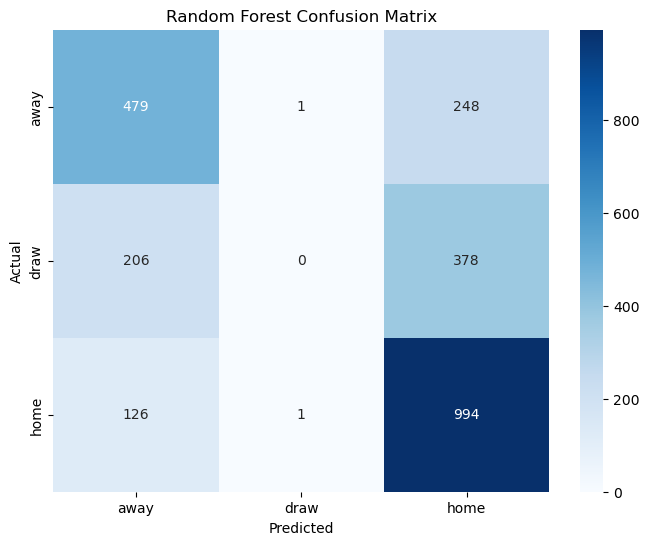

Model: XGBoost
Accuracy: 0.6580353473078504
Classification Report:
              precision    recall  f1-score   support

        away       0.67      0.70      0.69       728
        draw       0.39      0.19      0.26       584
        home       0.71      0.87      0.78      1121

    accuracy                           0.66      2433
   macro avg       0.59      0.59      0.57      2433
weighted avg       0.62      0.66      0.63      2433





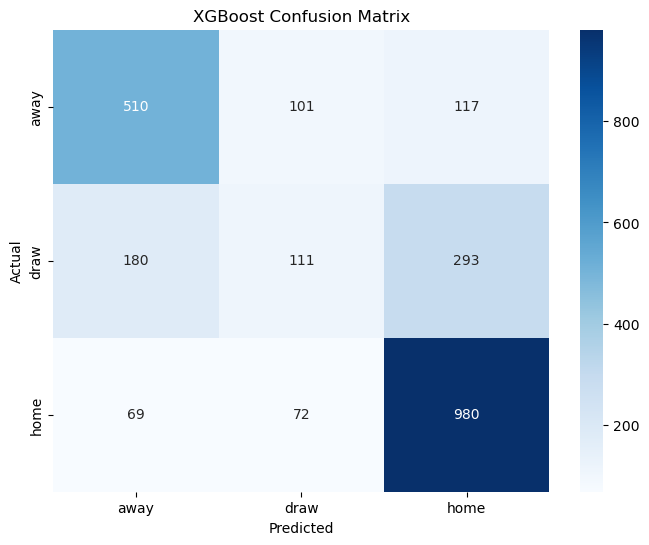

Model: LightGBM
Accuracy: 0.6670776818742293
Classification Report:
              precision    recall  f1-score   support

        away       0.67      0.72      0.69       728
        draw       0.43      0.18      0.25       584
        home       0.71      0.89      0.79      1121

    accuracy                           0.67      2433
   macro avg       0.60      0.60      0.58      2433
weighted avg       0.63      0.67      0.63      2433





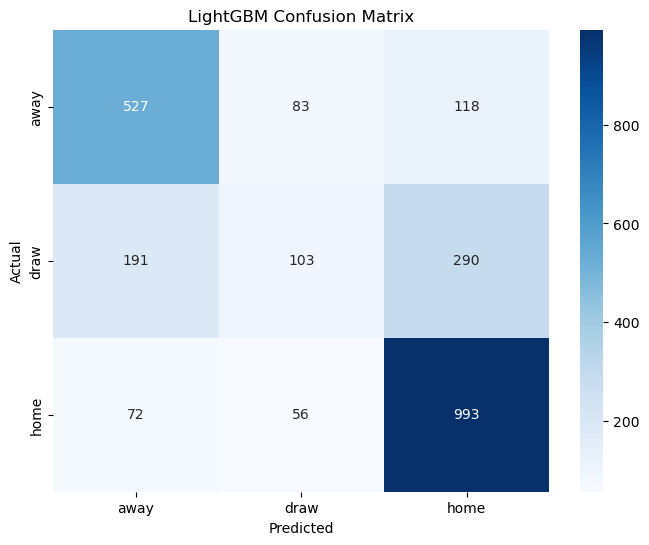

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate models and plot confusion matrix
for name, model in models.items():
    y_pred = model.predict(test_data[features])
    test_data[f'winner_prediction_{name}'] = y_pred
    accuracy = accuracy_score(test_data[target], y_pred)
    report = classification_report(test_data[target], y_pred, target_names=target_encoder.classes_)
    cm = confusion_matrix(test_data[target], y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("\n" + "="*60 + "\n")

    plot_confusion_matrix(cm, name, target_encoder.classes_)


In [39]:
league_mapping = {
    1: 'Premier League',
    3: 'UEFA Champions League',
    2: 'Serie A',
    0: 'La Liga'
}

# Replace numerical league identifiers with actual league names
test_data['league_x'] = test_data['league_x'].map(league_mapping)


Evaluating model: Random Forest

League: Premier League
Accuracy: 0.6377295492487479
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65       195
           1       0.00      0.00      0.00       120
           2       0.65      0.88      0.75       284

    accuracy                           0.64       599
   macro avg       0.42      0.52      0.47       599
weighted avg       0.51      0.64      0.57       599

 
League: UEFA Champions League
Accuracy: 0.6535836177474402
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.60      0.63       153
           1       0.00      0.00      0.00       126
           2       0.65      0.95      0.77       307

    accuracy                           0.65       586
   macro avg       0.44      0.52      0.47       586
weighted avg       0.51      0.65      0.57       586

 
League: Serie A
Accuracy: 0.568471337579617

C:\Users\cradh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cradh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cradh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cradh\anaconda3\Lib\site-packag

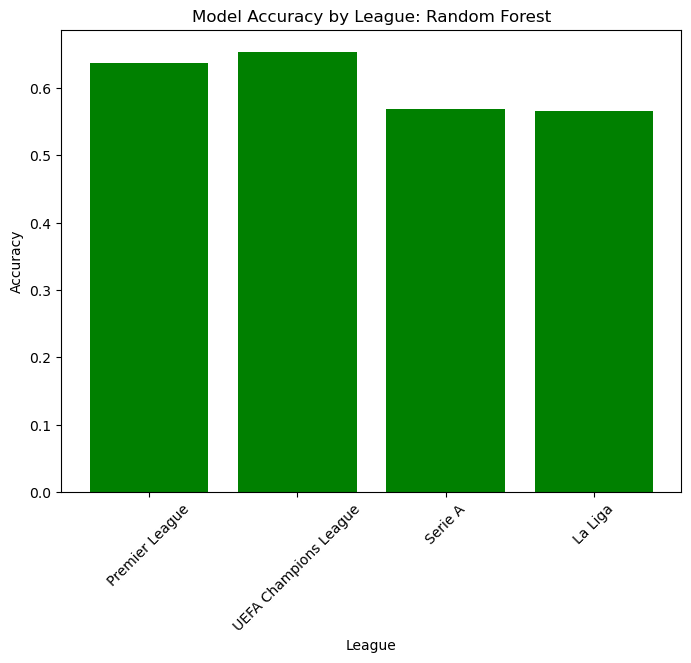


Evaluating model: XGBoost

League: Premier League
Accuracy: 0.669449081803005
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       195
           1       0.35      0.15      0.21       120
           2       0.70      0.87      0.77       284

    accuracy                           0.67       599
   macro avg       0.58      0.57      0.56       599
weighted avg       0.63      0.67      0.64       599

 
League: UEFA Champions League
Accuracy: 0.674061433447099
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       153
           1       0.26      0.12      0.16       126
           2       0.74      0.90      0.81       307

    accuracy                           0.67       586
   macro avg       0.56      0.57      0.55       586
weighted avg       0.62      0.67      0.64       586

 
League: Serie A
Accuracy: 0.6273885350318471
Classi

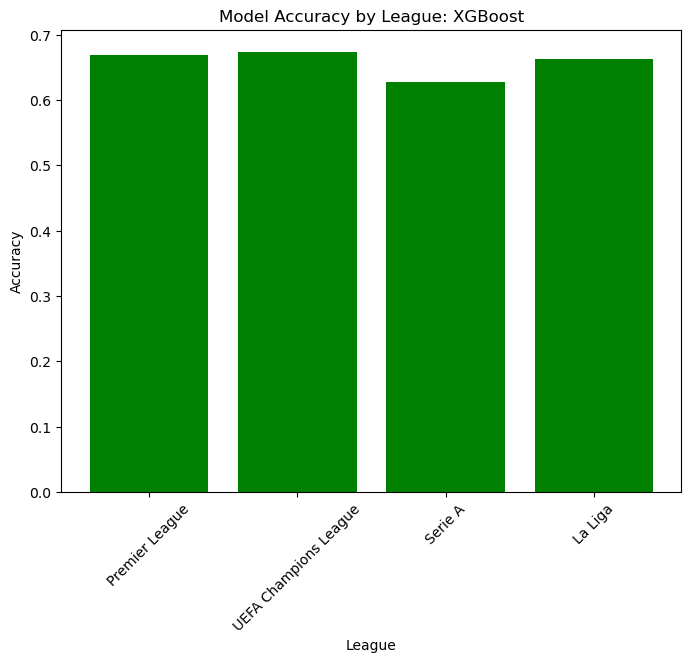


Evaluating model: LightGBM

League: Premier League
Accuracy: 0.7011686143572621
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       195
           1       0.47      0.20      0.28       120
           2       0.73      0.89      0.80       284

    accuracy                           0.70       599
   macro avg       0.64      0.61      0.60       599
weighted avg       0.67      0.70      0.67       599

 
League: UEFA Champions League
Accuracy: 0.689419795221843
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       153
           1       0.35      0.14      0.20       126
           2       0.74      0.92      0.82       307

    accuracy                           0.69       586
   macro avg       0.59      0.58      0.57       586
weighted avg       0.64      0.69      0.65       586

 
League: Serie A
Accuracy: 0.6289808917197452
Clas

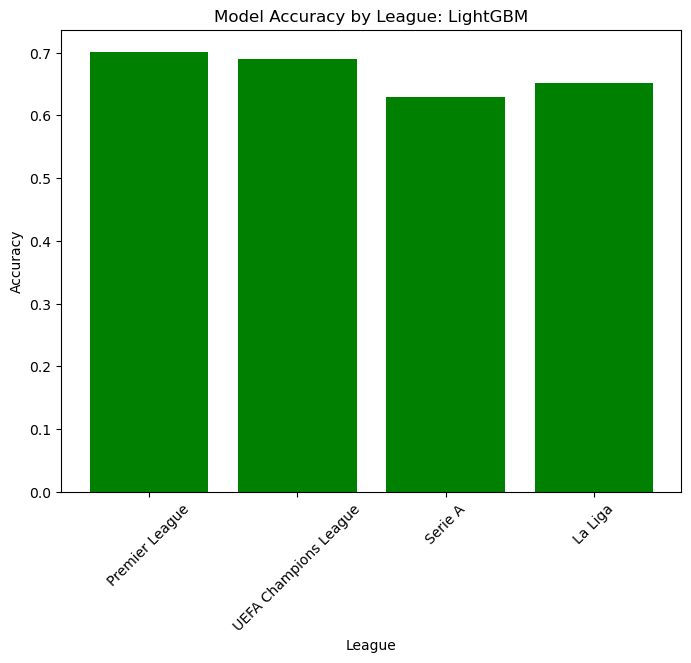

In [40]:
# Evaluate and plot accuracies by league for each model
league_accuracies = {}

for model_name in models.keys():
    print(f"\nEvaluating model: {model_name}\n")
    league_accuracies[model_name] = {}

    for league in test_data['league_x'].unique():
        test_data_sub = test_data[test_data['league_x'] == league]

        accuracy = accuracy_score(test_data_sub[target], test_data_sub[f'winner_prediction_{model_name}'])
        report = classification_report(test_data_sub[target], test_data_sub[f'winner_prediction_{model_name}'])

        print(f"League: {league}")
        print(f"Accuracy: {accuracy}")
        print(f"Classification Report:\n{report}")
        print(" ")

        # Store the accuracy in the dictionary
        league_accuracies[model_name][league] = accuracy

    # Plotting the accuracies in a bar graph
    plt.figure(figsize=(8, 6))
    plt.bar(league_accuracies[model_name].keys(), league_accuracies[model_name].values(),color='green')
    plt.xlabel('League')
    plt.ylabel('Accuracy')
    plt.title(f'Model Accuracy by League: {model_name}')
    plt.xticks(rotation=45)
    plt.show()

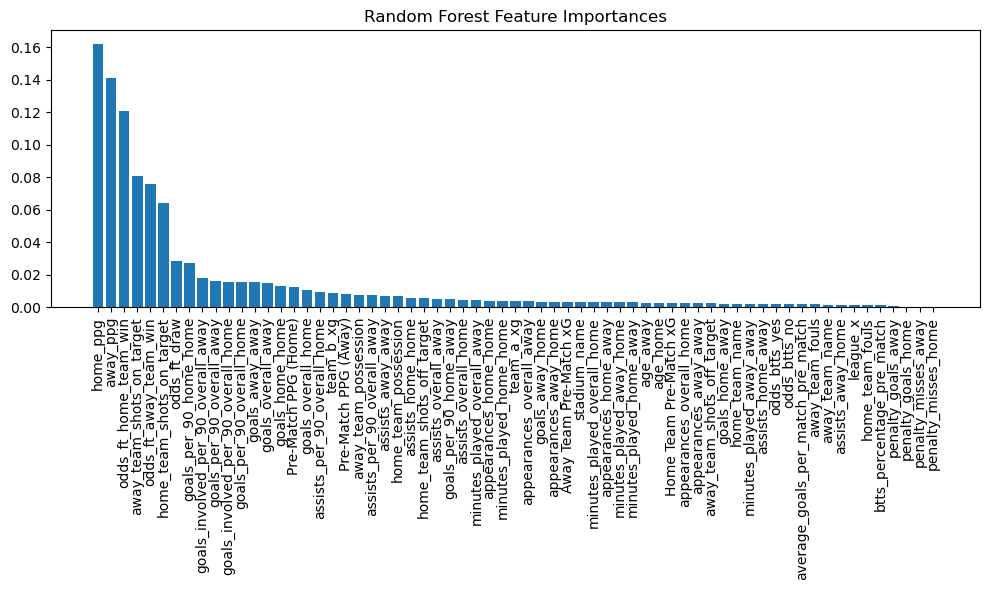

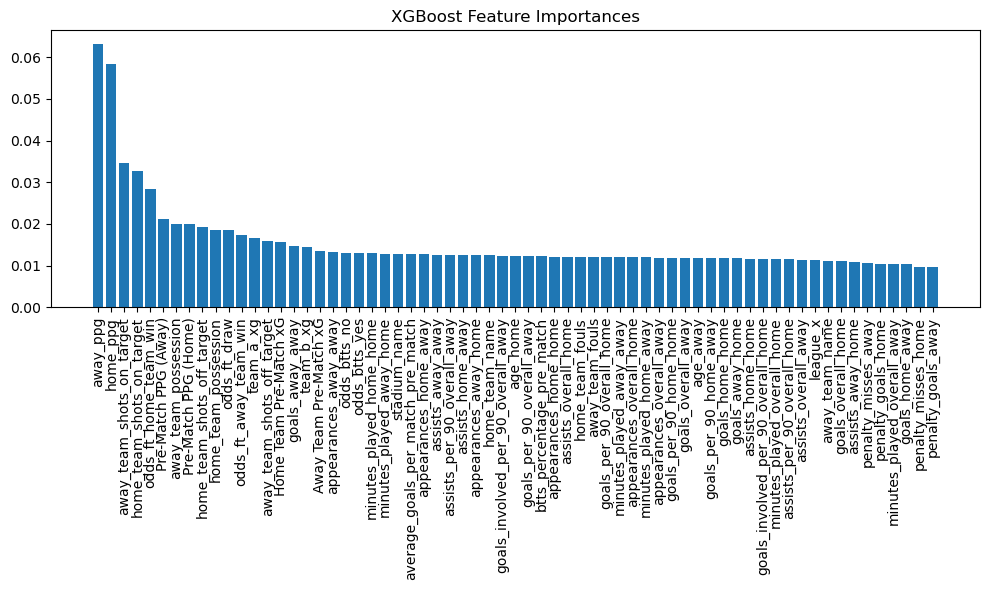

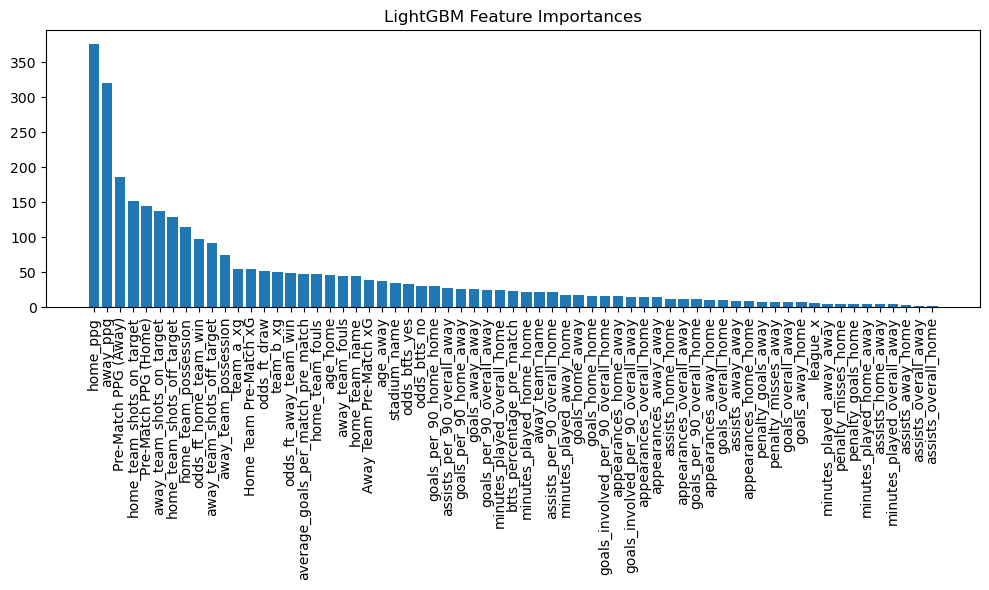

In [41]:
def plot_feature_importances(model, features, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title(f"{model_name} Feature Importances")
    plt.bar(range(len(features)), importances[indices], align="center")
    plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Random Forest feature importances
plot_feature_importances(rf_model, features, "Random Forest")

# XGBoost feature importances
plot_feature_importances(xgb_model, features, "XGBoost")

# LightGBM feature importances
plot_feature_importances(lgbm_model, features, "LightGBM")

In [42]:
test_data_pred_res= test_data[['home_team_name', 'away_team_name','winner','winner_prediction_Random Forest', 'winner_prediction_XGBoost',
       'winner_prediction_LightGBM']]

In [43]:
home_team_list=test_data_cat['home_team_name']
away_team_list=test_data_cat['away_team_name']

In [44]:
test_data_pred_res['home_team_name'] = home_team_list
test_data_pred_res['away_team_name'] = away_team_list

C:\Users\cradh\AppData\Local\Temp\ipykernel_20564\2839538152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_pred_res['home_team_name'] = home_team_list
C:\Users\cradh\AppData\Local\Temp\ipykernel_20564\2839538152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_pred_res['away_team_name'] = away_team_list


In [45]:
winner_mapping = {
    0: 'away',
    1: 'draw',
    2: 'home'
}

test_data_pred_res['winner'] = test_data_pred_res['winner'].map(winner_mapping)
test_data_pred_res['winner_prediction_Random Forest'] = test_data_pred_res['winner_prediction_Random Forest'].map(winner_mapping)
test_data_pred_res['winner_prediction_XGBoost'] = test_data_pred_res['winner_prediction_XGBoost'].map(winner_mapping)
test_data_pred_res['winner_prediction_LightGBM'] = test_data_pred_res['winner_prediction_LightGBM'].map(winner_mapping)

C:\Users\cradh\AppData\Local\Temp\ipykernel_20564\601180921.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_pred_res['winner'] = test_data_pred_res['winner'].map(winner_mapping)
C:\Users\cradh\AppData\Local\Temp\ipykernel_20564\601180921.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_pred_res['winner_prediction_Random Forest'] = test_data_pred_res['winner_prediction_Random Forest'].map(winner_mapping)
C:\Users\cradh\AppData\Local\Temp\ipykernel_20564\601180921.py:9: SettingWithC

In [46]:
test_data_pred_res.tail(20)

,home_team_name,away_team_name,winner,winner_prediction_Random Forest,winner_prediction_XGBoost,winner_prediction_LightGBM
3017,Inter Milan,Salzburg,home,home,home,home
3018,Inter Milan,Salzburg,home,home,home,home
3019,Benfica,Salzburg,away,home,draw,home
3022,Sporting Braga,Panathinaikos,home,home,home,home
3026,Molde,HJK,home,home,home,home
3028,Molde,KÍ,home,home,draw,draw
3030,Ferencváros,KÍ,away,away,away,away
3032,Olimpija,Ludogorets,home,home,home,home
3035,Astana,Dinamo Zagreb,away,away,away,away
3037,Astana,Dinamo Tbilisi,draw,home,draw,home
